# Экспериментальная лингвистика

## Домашнее задание 2


    • Задание: провести предварительный анализ данных
    o Выделить независимые и зависимые переменные
    o Какие переменные межгрупповые, какие внутригрупповые?
    o Поделить данные на выборки (возможно деление как по внутригрупповому, так и по межгрупповому признаку)
    o Для всего массива данных, так и внутри групп рассчитать: медиану, среднее, стандартное отклонение, максимальные и
    минимальные значения
    o Построить графики распределений
    o Предположить, какие переменные могут быть связаны, проверить предположение с помощью графиков или
    количественных метрик.
    Прокомментировать результат

In [129]:
import pandas as pd
import scipy
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2
import seaborn as sns

In [130]:
df = pd.read_excel('data_lecture_3_tACS.xlsx')
df.head()

,participant,stim_order,condition,AL,L1,answer,score,RT,task,session
0,0,RS,real,derartu,samolet,down,1.0,2.541925,AFC,train
1,0,RS,real,asamu,shprits,right,1.0,1.794262,AFC,train
2,0,RS,real,farimu,konvert,down,1.0,1.989078,AFC,train
3,0,RS,real,vortule,roza,left,1.0,1.904852,AFC,train
4,0,RS,real,topeme,terka,right,1.0,1.839869,AFC,train


**Графики распределения данных score, RT:**

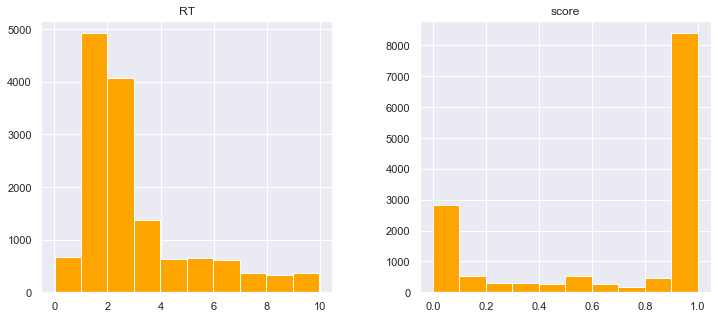

In [131]:
sns.set(rc={'figure.figsize':(12,5)})

ax=df[['score','RT']].hist(color='orange' )

Комментарий от преподавателя по поводу небинарных значений score: _"1 - верный, все остальное неверное"_

Думаю, имеет смысл сразу заменить все score < 1 на 0:

In [132]:
df.loc[df['score'] < 1, 'score'] = 0

Проверяем:

In [133]:
df['score'].unique()

array([ 1.,  0., nan])

Супер! **Новый график распределения score:**

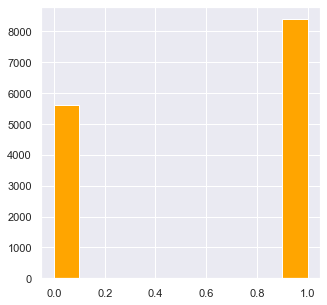

In [134]:
sns.set(rc={'figure.figsize':(5,5)})

ax=df['score'].hist(color='orange' )

**Независимые переменные:** condition, stim_order

**Зависимые переменные:** score, RT

**Межгрупповые переменные:** condition

**Внутригрупповые переменные:** stim_order, task, session

**Делим данные на выборки.** Я буду делить по condition на 2 выборки соответственно:

In [135]:
expr_df = df.loc[(df['condition'] == 'real')] # настоящая стимуляция, экспериментальная выборка
expr_df.head()

,participant,stim_order,condition,AL,L1,answer,score,RT,task,session
0,0,RS,real,derartu,samolet,down,1.0,2.541925,AFC,train
1,0,RS,real,asamu,shprits,right,1.0,1.794262,AFC,train
2,0,RS,real,farimu,konvert,down,1.0,1.989078,AFC,train
3,0,RS,real,vortule,roza,left,1.0,1.904852,AFC,train
4,0,RS,real,topeme,terka,right,1.0,1.839869,AFC,train


In [136]:
cntrl_df = df.loc[(df['condition'] == 'sham')] # плацебо стимуляция, контрольная выборка
cntrl_df.head()

,participant,stim_order,condition,AL,L1,answer,score,RT,task,session
37,0,RS,sham,enkalu,svetofor,down,1.0,1.741873,AFC,train
38,0,RS,sham,akastu,jakor',right,1.0,1.502057,AFC,train
39,0,RS,sham,kaltane,kogot',down,1.0,0.846658,AFC,train
40,0,RS,sham,venkere,sapog,left,1.0,1.813993,AFC,train
41,0,RS,sham,tivere,uho,right,1.0,0.957222,AFC,train


In [137]:
print(expr_df.shape)
print(cntrl_df.shape)

(8880, 10)
(8880, 10)


Получилось поровну!

**Для всего массива данных рассчитаем: медиану (50%), среднее (mean), стандартное отклонение (std), максимальные (max) и минимальные значения (min)**

In [138]:
df[['score', 'RT']].describe()

,score,RT
count,13986.000000,13986.000000
mean,0.599314,3.005942
std,0.490055,2.096666
min,0.000000,0.010000
25%,0.000000,1.628720
50%,1.000000,2.264102
75%,1.000000,3.410612
max,1.000000,9.966082


Отдельно рассчитываем **эти же показатели для выборок:**

In [139]:
expr_df[['score', 'RT']].describe()

,score,RT
count,7009.000000,7009.000000
mean,0.599658,3.010420
std,0.490003,2.103503
min,0.000000,0.010000
25%,0.000000,1.627030
50%,1.000000,2.274597
75%,1.000000,3.414376
max,1.000000,9.965174


In [140]:
cntrl_df[['score', 'RT']].describe()

,score,RT
count,6977.000000,6977.000000
mean,0.598968,3.001444
std,0.490143,2.089916
min,0.000000,0.037574
25%,0.000000,1.629681
50%,1.000000,2.254840
75%,1.000000,3.405639
max,1.000000,9.966082


_Комментарий: все важные показатели у двух выборок совпадают... неужели наличие или отсутствие стимуляции практически не влияет ни на точность, ни на скорость реакции?_

**Графики распределения для экспериментальной и контрольной выборок соответсвенно:**

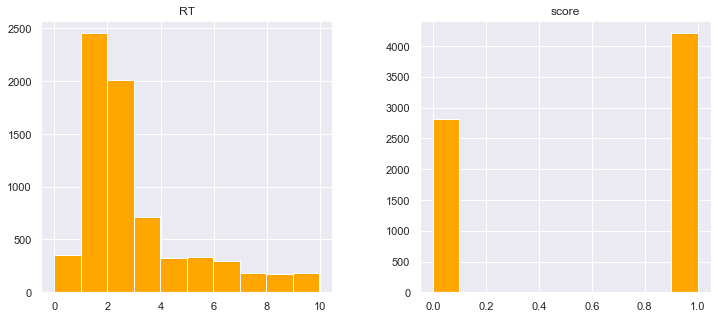

In [141]:
sns.set(rc={'figure.figsize':(12,5)})

ax=expr_df[['score','RT']].hist(color='orange' )

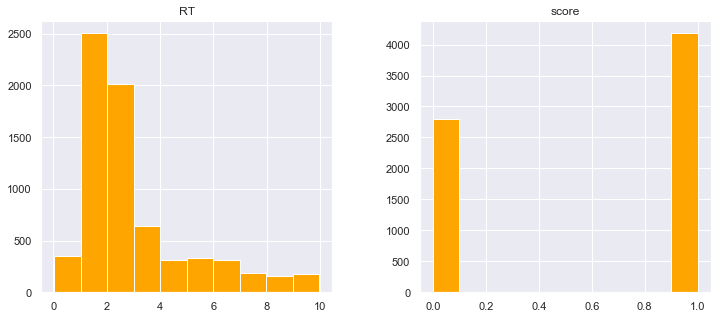

In [142]:
sns.set(rc={'figure.figsize':(12,5)})

ax=cntrl_df[['score','RT']].hist(color='orange' )

_Комментарий: графики тоже выглядят идентично... Причинами недостаточного межгруппового различия, помимо отсутствия эффекта, могут быть: (1) слишком большая вариативность внутри групп, которая "прячет" эффект; (2) мера score, например, недостаточно чувствительная: нужно больше уровней переменной (сейчас только два: 1 и 0), чтобы улавливать изменения.. может, стоило бы смотреть на score как на непрерывную величину; (3) дизайн эксперимента таков, что между экспериментальной и контрольной группой недостаточная разница (т.е. манипуляция со стороны исследователей слишком слабая), поэтому эффект не наблюдается_

**Ради интереса попробуем разделить данные на 4 выборки по 2м переменным condition и stim_order:** 
1. экспериментальная подгруппа RS
2. экспериментальная подгруппа SR
3. контрольная подгруппа RS
4. контрольная подгруппа SR

In [143]:
RS_expr_df = expr_df.loc[(expr_df['stim_order'] == 'RS')] # группа 1
SR_expr_df = expr_df.loc[(expr_df['stim_order'] == 'SR')] # группа 2
RS_cntrl_df = cntrl_df.loc[(cntrl_df['stim_order'] == 'RS')] # группа 3
SR_cntrl_df = cntrl_df.loc[(cntrl_df['stim_order'] == 'SR')] # группа 4

In [149]:
# 1. экспериментальная подгруппа RS

RS_expr_df[['score', 'RT']].describe()

,score,RT
count,3596.000000,3596.000000
mean,0.603726,3.146460
std,0.489191,2.157042
min,0.000000,0.578276
25%,0.000000,1.718379
50%,1.000000,2.335478
75%,1.000000,3.653529
max,1.000000,9.965174


In [145]:
# 2. экспериментальная подгруппа SR

SR_expr_df[['score', 'RT']].describe()

,score,RT
count,3413.000000,3413.000000
mean,0.595371,2.867085
std,0.490892,2.036081
min,0.000000,0.010000
25%,0.000000,1.522900
50%,1.000000,2.200777
75%,1.000000,3.274236
max,1.000000,9.964927


_Комментарий (1 VS 2): в экспериментальной группе в среднем время реакции примерно на 279 миллисекунды меньше у подгруппы, где настоящая стимуляция происходила после плацебо-стимуляции (SR). При этом средняя точность у RS и SR подгрупп практически одинаковая. Медиана времени реакции в подгруппе SR смещена левее (в меньшую сторону) примерно на 135 миллисекунд, чем у подгруппы RS, при этом максимальное время реакции у подгрупп практически одинаковое, а минимальное - меньше у SR на 568 миллисекунд по сравнению с подгруппой RS (хотя, возможно, минимум в 10 миллисекунд - это выброс). Таким образом напрашивается вывод, что внутри экспериментальной группы разница в порядке стимуляций не влияет на точность ответов, но влияет на время реакции так, что участники, прошедшие сначала плацебо, а потом реальную стимуляию (SR), отвечают быстрее. Возможно, это показывает, что во время контрольных испытаний с плацебо-стимуляцией они успели приноровиться к заданиям и стали увереннее ко второму, экспериментальному этапу._

In [146]:
# 3. контрольная подгруппа RS

RS_cntrl_df[['score', 'RT']].describe()

,score,RT
count,3548.000000,3548.000000
mean,0.584273,2.917775
std,0.492916,2.035658
min,0.000000,0.057000
25%,0.000000,1.571825
50%,1.000000,2.218797
75%,1.000000,3.401556
max,1.000000,9.966082


_Комментарий (1 VS 3): в группе RS у экспериментальной и контрольной подгрупп практически не отличается динамика точности ответов. Среднее время реакции примерно на 229 милисекунд меньше у контрольной подгруппы. Максимальное время реакции у двух подгрупп практически одинаковое, минимальное примерно на 521 миллисекунду меньше у контрольной подгруппы RS. Медиана при этом также смещена на 117 миллисекунд левее (в меньшую сторону) у контрольной подгруппы RS. Эти данные подкрепляют гипотезу о том, что эффекта от стимуляции практически нет (либо он не виден на этих данных), а колебания во времени реакции связаны с возрастающей уверенностью участников ко второму туру испытаний._

In [147]:
# 4. контрольная подгруппа SR

SR_cntrl_df[['score', 'RT']].describe()

,score,RT
count,3429.000000,3429.000000
mean,0.614173,3.088017
std,0.486861,2.141471
min,0.000000,0.037574
25%,0.000000,1.701730
50%,1.000000,2.287795
75%,1.000000,3.405639
max,1.000000,9.950723


_Комментарий (2 VS 4): в группе SR между контрольной и экспериментальной подгруппами практически нет разницы в средней точности ответов. Среднее время реакции больше у контрольной подгруппы примерно на 221 миллисекунду, минимальное и максимальное время реакции у двух подгрупп практически одинаковое. Медиана времени реакции у экспериментальной подгруппы смещена левее (в меньшую сторону) примерно на 87 миллисекунд по сравнению с экспериментальной подгруппой._

_Комментарий (3 VS 4): в контрольной группе между подгруппами SR и RS нет разницы в средней точности ответов. Среднее время реакции больше у подгруппы SR примерно на 171 миллисекунду. Медиана времени реакции у подгруппы RS смещена левее (в меньшую сторону) примерно на 69 миллисекунд по сравнению с подгруппой SR, максимальное время у двух подгрупп неразличимо, минимальное: всего на 20 миллисекунд меньше у подгруппы SR. Таким образом, напрашивается вывод, что, как и внутри экспериментальной группы, в контрольной группе, если этот вид стимуляции (плацебо) был вторым по счёту, участники в среднем отвечают быстрее._

_**Общий вывод**: на этих данных не наблюдается эффекта от электрической стимуляции ни на корректность выполнения заданий, проверяющих запоминание слов, ни на время реакции в рамках этих заданий. При этом можно наблюдать, как участники, приступая ко второму по очереди этапу исследования (вне зависимости от типа стимуляции в нём), отвечают быстрее и уверенее (скорее всего, потому что им уже известен и понятен формат заданий). Выше я уже описывала возможные причины нулевого эффекта стимуляции и как можно было бы улучшить эксперимент, чтобы "засечь" его._